# Practice for Machine Learning

Can we predict whether an employee is likely to leave the company based on various factors such as job satisfaction, 
work-life balance, years at the company, and other relevant features?

   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0            1   58  Female        Married         IT    Manager          1   
1            2   48  Female        Married      Sales  Assistant          5   
2            3   34    Male        Married  Marketing  Assistant          1   
3            4   27  Female       Divorced  Marketing    Manager          1   
4            5   40    Male       Divorced  Marketing  Executive          1   

   Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \
0           15488           28                15  ...        No   
1           13079           28                 6  ...       Yes   
2           13744           24                24  ...       Yes   
3            6809           26                10  ...        No   
4           10206           52                29  ...        No   

   Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  \
0              6                             54           

C:\Users\timha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\timha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\timha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


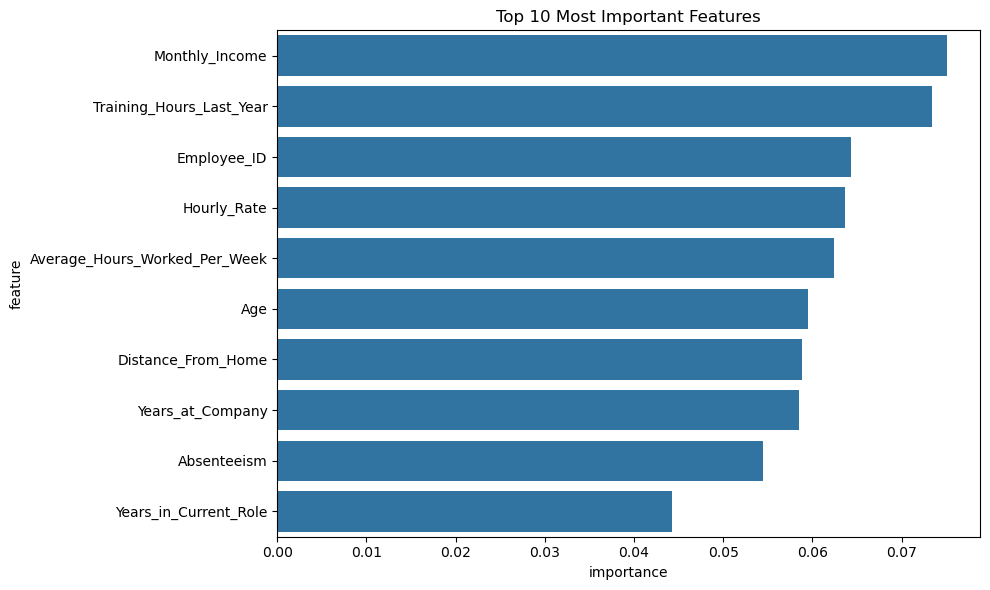

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\timha\Downloads\employee_attrition_dataset.csv")

print(df.head())
print(df.info())
print(df.describe())

# Preprocess the data
# Convert categorical variables to numerical
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into features (X) and target variable (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()
